In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import os
import matplotlib.pyplot as plt
from itertools import compress
import statsmodels.api as sm

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
os.chdir("E:/Python DS/")

In [4]:
plt.rc("font",size = 14)
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)

In [5]:
df = pd.read_csv("banking.csv", header = 0)
df = df.dropna()
print(df.shape)
print(df.columns)

(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


In [6]:
print(df.head())

   age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu ...         1    999         0  nonexistent   
1  cellular   nov         fri ...         1    999         0  nonexistent   
2  cellular   jun         thu ...         3      6         2      success   
3  cellular   apr         fri ...         2    999         0  nonexistent   
4  cellular   aug         fri ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          1.4         

# Data Cleaning

In [7]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'], dtype=object)

In [8]:
df['education'] = np.where(df['education'] == 'basic.4y', 'Basic', df['education'])
df['education'] = np.where(df['education'] == 'basic.6y', 'Basic', df['education'])
df['education'] = np.where(df['education'] == 'basic.9y', 'Basic', df['education'])

In [9]:
df['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

# Data Exploration

In [10]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

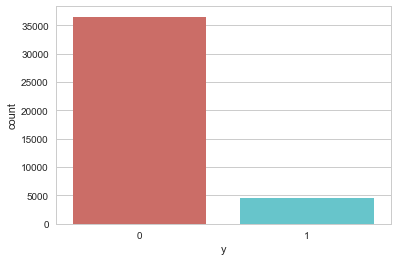

In [11]:
sns.countplot(x = 'y', data=df, palette = 'hls')
plt.show()
plt.savefig('count_plot')

#### Exploring the target variable

In [12]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


#### Exploring job

In [13]:
df.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


#### Exploring Maritals

In [14]:
df.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


#### Exploring Educations

In [15]:
df.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


# Visualization

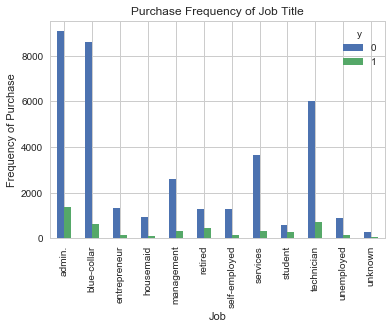

In [16]:
%matplotlib inline
pd.crosstab(df.job, df.y).plot(kind = 'bar')
plt.title('Purchase Frequency of Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

###### The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

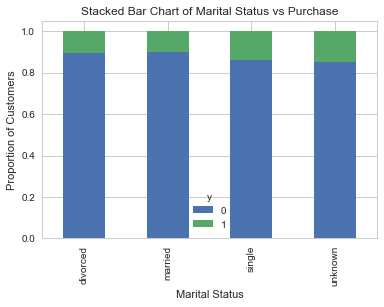

In [17]:
table = pd.crosstab(df.marital, df.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind='bar',stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('marital_vs_pur_stack')

###### The marital status does not seem a strong predictor for the outcome variable.

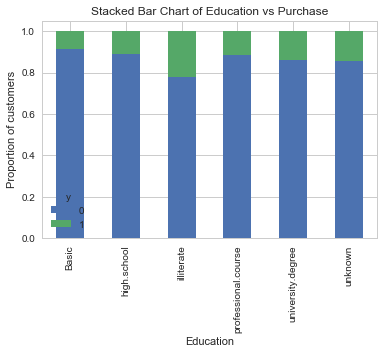

In [18]:
table = pd.crosstab(df.education, df.y)
table.div(table.sum(1).astype(float),axis = 0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of customers')
plt.savefig('edu_vs_pur_stack')

###### Education seems a good predictor of the outcome variable.

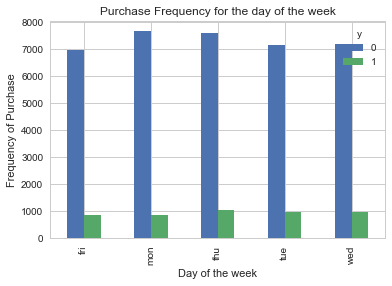

In [19]:
pd.crosstab(df.day_of_week, df.y).plot(kind='bar')
plt.title('Purchase Frequency for the day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Frequency of Purchase')
plt.savefig('day_vs_pur_bar')

###### Day of week may not be a good predictor of the outcome.

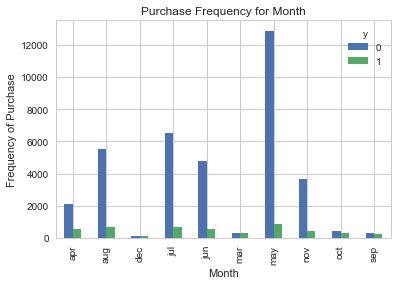

In [20]:
pd.crosstab(df.month,df.y).plot(kind = 'bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('month_vs_pur_bar')

###### Month might be a good predictor of the outcome variable.

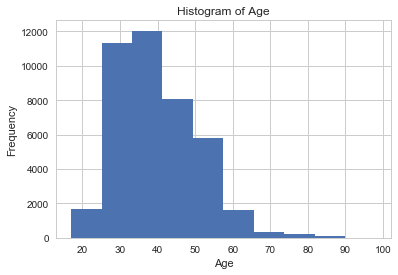

In [21]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

###### Most of the customers of the bank in this dataset are in the age range of 30–40.

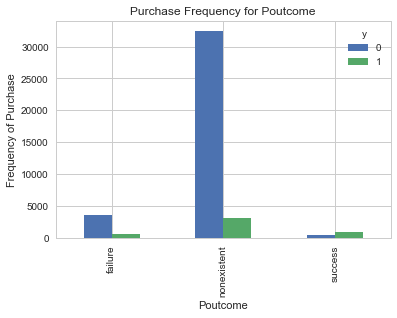

In [22]:
pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

###### Poutcome seems to be a good predictor of the outcome variable.

# Create Dummy Variables

In [23]:
cat_vars = ['job','marital','education','poutcome','default','housing','loan','contact','month','day_of_week']
for var in cat_vars:
    cat_list = pd.get_dummies(df[var],prefix=var)
    df = pd.concat([df,cat_list],axis=1)
    df = df.drop([var],axis=1)

In [24]:
print(df.columns.values)
print(df.shape)

['age' 'duration' 'campaign' 'pdays' 'previous' 'emp_var_rate'
 'cons_price_idx' 'cons_conf_idx' 'euribor3m' 'nr_employed' 'y'
 'job_admin.' 'job_blue-collar' 'job_entrepreneur' 'job_housemaid'
 'job_management' 'job_retired' 'job_self-employed' 'job_services'
 'job_student' 'job_technician' 'job_unemployed' 'job_unknown'
 'marital_divorced' 'marital_married' 'marital_single' 'marital_unknown'
 'education_Basic' 'education_high.school' 'education_illiterate'
 'education_professional.course' 'education_university.degree'
 'education_unknown' 'poutcome_failure' 'poutcome_nonexistent'
 'poutcome_success' 'default_no' 'default_unknown' 'default_yes'
 'housing_no' 'housing_unknown' 'housing_yes' 'loan_no' 'loan_unknown'
 'loan_yes' 'contact_cellular' 'contact_telephone' 'month_apr' 'month_aug'
 'month_dec' 'month_jul' 'month_jun' 'month_mar' 'month_may' 'month_nov'
 'month_oct' 'month_sep' 'day_of_week_fri' 'day_of_week_mon'
 'day_of_week_thu' 'day_of_week_tue' 'day_of_week_wed']
(41188, 62

In [25]:
df_final_vars = df.columns.values.tolist()
y = ['y']
x = [i for i in df_final_vars if i not in y]

In [26]:
logreg = LogisticRegression()

rfe = RFE(logreg,18)
rfe.fit(df[x],df.y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=18, step=1, verbose=0)

In [27]:
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False  True False False  True
 False False False  True False False  True False False False False False
 False False  True False False False False False  True  True  True  True
 False False False False False False False False  True False  True  True
  True False False  True  True  True False False False  True False False
 False]
[35 33 14 40  1 19 23 25  1 31 13  1 27 39 42  1 26  6  1 16 15 41  8  9 10
 43  1  2 38  3  4  5  1  1  1  1 22 44 36 17 37 24 21 18  1 20  1  1  1 29
 28  1  1  1 32 12 11  1 34 30  7]


In [28]:
col = list(compress(x,rfe.support_))
print(col)
dfnew = df[col]
dfnew = dfnew.T.drop_duplicates().T

['previous', 'euribor3m', 'job_blue-collar', 'job_retired', 'job_student', 'education_Basic', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'default_no', 'contact_cellular', 'month_apr', 'month_aug', 'month_dec', 'month_mar', 'month_may', 'month_nov', 'day_of_week_mon']


In [29]:
print(dfnew.columns)

Index(['previous', 'euribor3m', 'job_blue-collar', 'job_retired',
       'job_student', 'education_Basic', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'default_no',
       'contact_cellular', 'month_apr', 'month_aug', 'month_dec', 'month_mar',
       'month_may', 'month_nov', 'day_of_week_mon'],
      dtype='object')


In [30]:
X = dfnew
Y = df.y

# Implementing the model

In [31]:
logit_model = sm.Logit(Y,X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.281054
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41170
Method:                           MLE   Df Model:                           17
Date:                Wed, 27 Jun 2018   Pseudo R-squ.:                  0.2016
Time:                        09:38:34   Log-Likelihood:                -11576.
converged:                       True   LL-Null:                       -14499.
                                        LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                 0.2103      0.051      4.121      0.000       0.110       0.310

# Logistic Regression

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [34]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("Y_train",Y_train.shape)
print("Y_test",Y_test.shape)

X_train (28831, 18)
X_test (12357, 18)
Y_train (28831,)
Y_test (12357,)


In [35]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
y_pred = logreg.predict(X_test)

In [37]:
print("Accuracy of logistic regression on test data: {:.2f}".format(logreg.score(X_test,Y_test)))

Accuracy of logistic regression on test data: 0.90


#### Cross Validation

In [38]:
kfold = model_selection.KFold(n_splits=10,random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, Y_train,cv=kfold,scoring=scoring)

In [39]:
print("10-fold cross validation accuracy: %.3f" % (results.mean()))

10-fold cross validation accuracy: 0.898


In [40]:
results

array([ 0.89840499,  0.90010406,  0.90530697,  0.89316684,  0.907735  ,
        0.89108567,  0.89732917,  0.89767603,  0.89559487,  0.89663545])

In [48]:
metrics.confusion_matrix(Y_test,y_pred)

array([[10871,   110],
       [ 1105,   271]], dtype=int64)

In [ ]:
print(10981/12357)